In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
acc_df = pd.read_csv('acc_data_after_shuffling.csv',engine = 'python')
acc_df.head()

,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,1st_point_of_impact,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,9,0,18,0,8,0,0,0,0,1,...,8,1,0,0,0,0,0,9,1,3
1,20,0,4,0,0,0,0,0,0,1,...,6,1,1,1,0,0,0,0,1,1
2,1,0,9,0,5,0,0,0,0,1,...,8,1,0,0,0,0,0,1,1,2
3,3,0,4,0,2,0,0,0,0,1,...,6,1,0,0,0,0,0,3,1,3
4,9,0,14,0,1,0,0,0,0,4,...,3,1,1,2,0,0,0,0,1,2


In [3]:
acc_df['accident_severity'].value_counts()

1    155053
2     28161
3      2836
Name: accident_severity, dtype: int64

In [4]:
acc_df.columns


Index(['vehicle_type', 'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_location-restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       '1st_point_of_impact', 'was_vehicle_left_hand_drive?',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver', 'engine_capacity_(cc)', 'propulsion_code',
       'age_of_vehicle', 'driver_home_area_type',
       'NUmber_of_Casualities_unique_to_accident_index',
       'No_of_Vehicles_involved_unique_to_accident_index', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'day_of_week', 'time',
       'local_authority_(district)', 'local_authority_(highway)',
       '1st_road_class', '1st_road_number', 'road_type', 'speed_limit',
       'junction_detail', 'junction_control', '2nd_road_class',
       '2nd_road

In [5]:
acc_cat = acc_df[['vehicle_type', 'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_location-restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       '1st_point_of_impact', 'was_vehicle_left_hand_drive?',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver','propulsion_code',
        'driver_home_area_type',
       'NUmber_of_Casualities_unique_to_accident_index',
       'No_of_Vehicles_involved_unique_to_accident_index', 'police_force', 'accident_severity',
        'day_of_week', 
       'local_authority_(district)',
       '1st_road_class','road_type', 'junction_detail', 'junction_control', '2nd_road_class',
       '2nd_road_number', 'pedestrian_crossing-human_control',
       'pedestrian_crossing-physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'casualty_reference', 'casualty_class', 'sex_of_casualty',
       'age_of_casualty', 'age_band_of_casualty', 'casualty_severity',
       'pedestrian_location', 'pedestrian_movement', 'car_passenger',
       'bus_or_coach_passenger', 'pedestrian_road_maintenance_worker',
       'casualty_type', 'casualty_home_area_type', 'casualty_imd_decile']]

In [6]:
acc_cat.head()

,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,1st_point_of_impact,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,9,0,18,0,8,0,0,0,0,1,...,8,1,0,0,0,0,0,9,1,3
1,20,0,4,0,0,0,0,0,0,1,...,6,1,1,1,0,0,0,0,1,1
2,1,0,9,0,5,0,0,0,0,1,...,8,1,0,0,0,0,0,1,1,2
3,3,0,4,0,2,0,0,0,0,1,...,6,1,0,0,0,0,0,3,1,3
4,9,0,14,0,1,0,0,0,0,4,...,3,1,1,2,0,0,0,0,1,2


In [7]:
print(acc_cat.dtypes)

vehicle_type                                        int64
towing_and_articulation                             int64
vehicle_manoeuvre                                   int64
vehicle_location-restricted_lane                    int64
junction_location                                   int64
skidding_and_overturning                            int64
hit_object_in_carriageway                           int64
vehicle_leaving_carriageway                         int64
hit_object_off_carriageway                          int64
1st_point_of_impact                                 int64
was_vehicle_left_hand_drive?                        int64
journey_purpose_of_driver                           int64
sex_of_driver                                       int64
age_of_driver                                       int64
age_band_of_driver                                  int64
propulsion_code                                     int64
driver_home_area_type                               int64
NUmber_of_Casu

# Chi-Square Test for Feature Selection in Machine learning

In [8]:
from sklearn.feature_selection import chi2

In [9]:
X = acc_cat.drop('accident_severity',axis=1)
y = acc_cat['accident_severity']

In [10]:
chi_scores = chi2(X,y)


In [11]:
chi_scores

(array([1.37355931e+03, 4.74450135e+02, 8.47173583e+03, 1.43578022e+02,
        3.77702106e+03, 3.47434784e+03, 2.20320089e+03, 9.49994342e+03,
        1.07362454e+04, 3.87768195e+02, 1.33419024e-01, 1.00970623e+02,
        2.39015976e+02, 2.69601957e+03, 1.32748991e+02, 9.55471017e+01,
        2.28211596e+02, 5.41028572e+03, 4.41221974e+02, 2.02296322e+04,
        1.00110286e+01, 2.16484491e+05, 1.29505115e+02, 1.77379098e+02,
        2.06402213e+03, 3.77702106e+03, 3.77702106e+03, 5.90055168e+05,
        9.00224768e+00, 8.71805725e+02, 1.27580967e+03, 2.21805836e+01,
        1.01585444e+01, 2.18854169e+01, 6.29147354e+01, 5.02499876e+02,
        2.93817020e+02, 1.68961360e+03, 1.95005476e+02, 2.10147230e+02,
        7.31328162e+03, 4.18038094e+02, 1.63260518e+04, 3.59321482e+03,
        2.10621194e+03, 1.42011384e+02, 1.35376639e+02, 2.71730954e+01,
        2.67469499e+03, 1.79003761e+02, 2.19857638e+02]),
 array([5.43731588e-299, 9.42892606e-104, 0.00000000e+000, 6.64398530e-032,
  

In [12]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

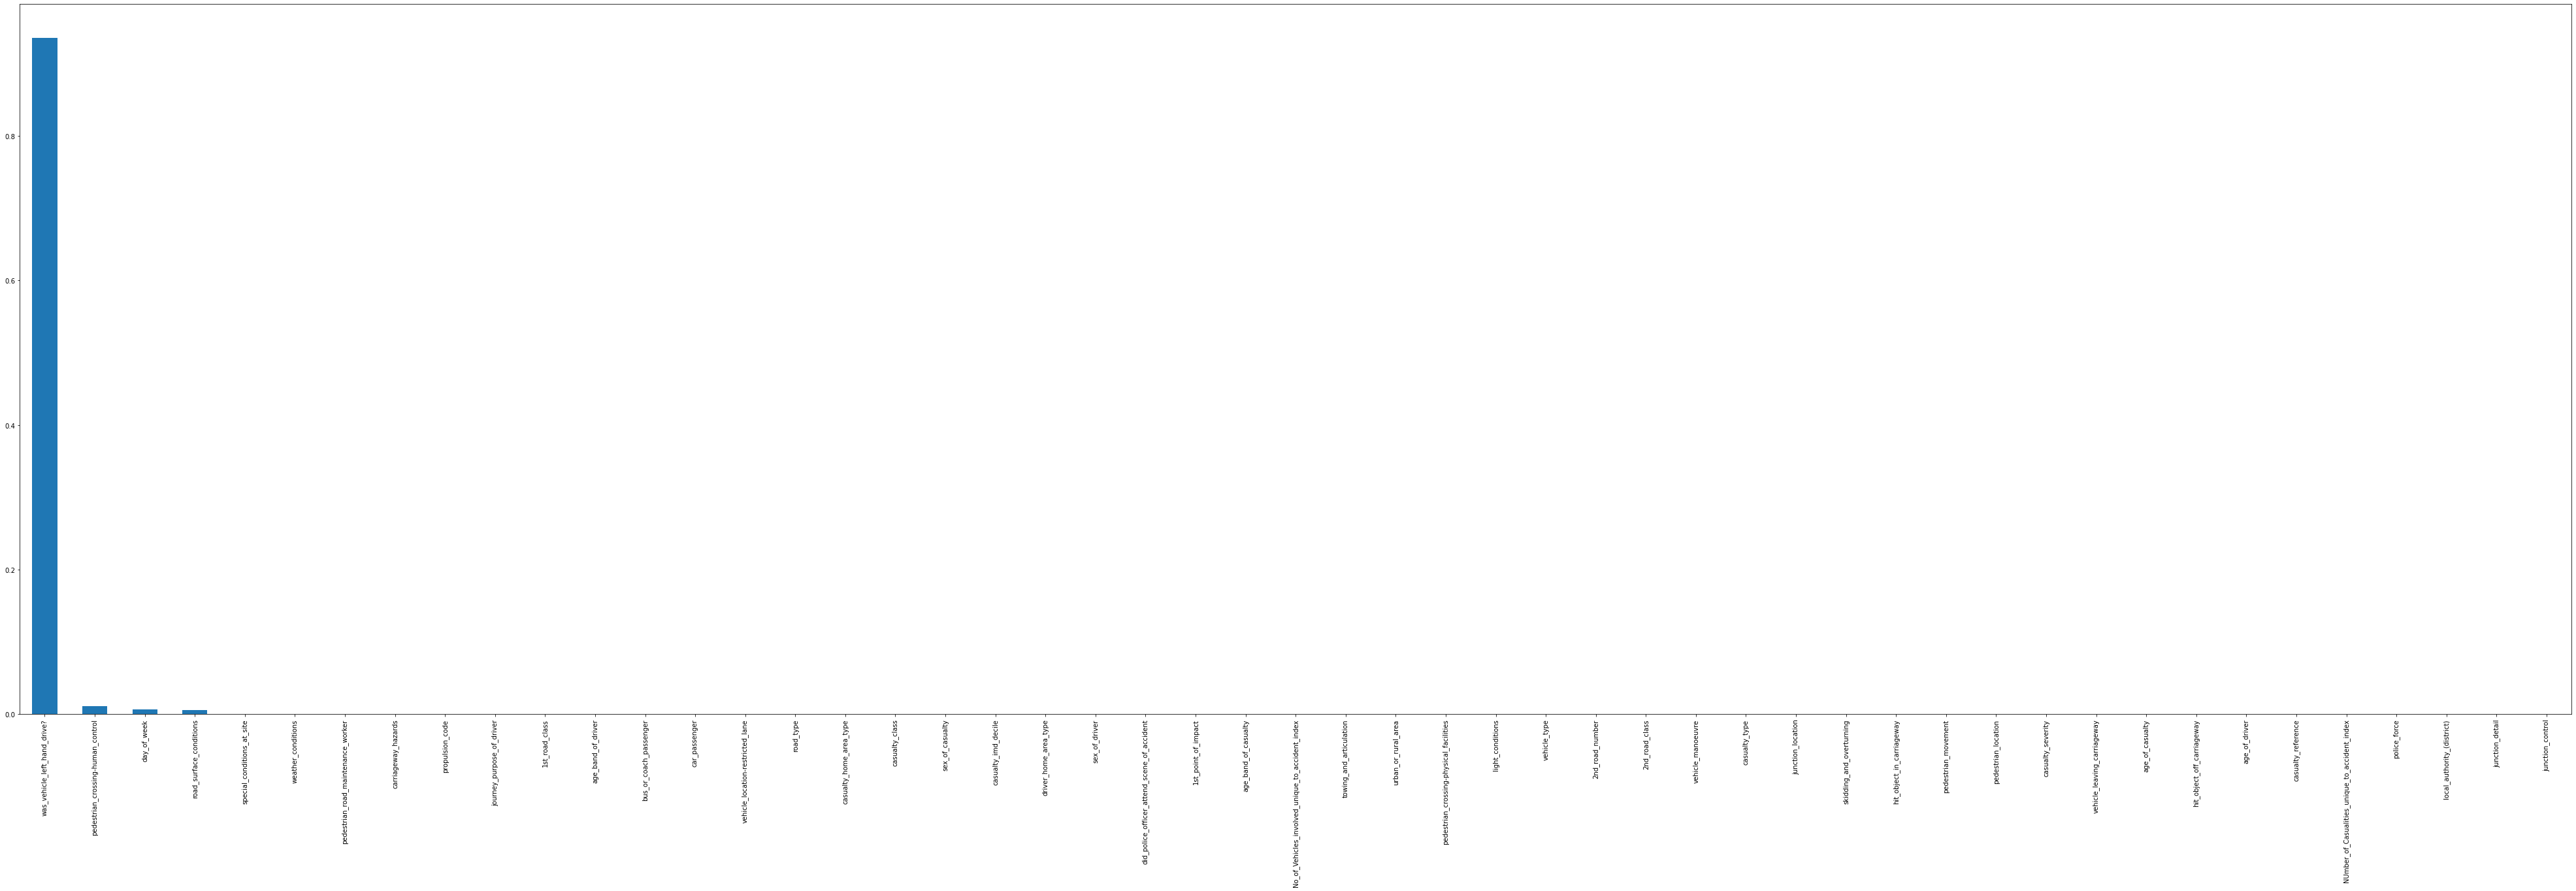

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(70,20))
p_values.plot.bar()
plt.show()

here since was_driver_left has higher value then it can be eliminated since was_driver_left and accident_severity variables are independent, was_driver_left variable cannot be selected for training the model.

# Cramer_V for Feature Selection in Machine learning

In [14]:
acc_obj = acc_cat.copy() 

cramer_v need categorical data

In [15]:
acc_obj = acc_obj.astype('category')

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


# compute Cramér's V for all pairs of columns
n = acc_obj.shape[1]
cramer_matrix = np.zeros((n,n))
for i in range(n):
    for j in range(i+1,n):
        cramer_matrix[i,j] = cramers_v(acc_obj.iloc[:,i], acc_obj.iloc[:,j])
        cramer_matrix[j,i] = cramer_matrix[i,j]

# create a heatmap of Cramér's V values
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white')
mask = np.zeros_like(cramer_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(cramer_matrix, mask=mask, cmap='coolwarm', square=True, annot=True)
plt.show()

NameError: name 'chi2_contingency' is not defined

In [16]:
cramer_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
from scipy.stats import chi2_contingency

In [18]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

categorical_vars = acc_obj.select_dtypes(include=['object']).columns
cramers_v_matrix = pd.DataFrame(index=categorical_vars, columns=categorical_vars)
for row in categorical_vars:
    for col in categorical_vars:
        cramers_v_matrix.loc[row, col] = cramers_v(acc_obj[row], acc_obj[col])


In [19]:
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [29]:
rows= []



for var1 in acc_obj:
  col = []
  for var2 in acc_obj :
    cramers =cramers_V(acc_obj[var1], acc_obj[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = acc_obj.columns, index =acc_obj.columns)

C:\Users\DELL\AppData\Local\Temp/ipykernel_19152/3301708134.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cramers_results = np.array(rows)


In [ ]:
# Find the maximum Cramer's V value and variable pairs with Cramer's V value > threshold
threshold = 0.9

max_cramer = df[df < 1].max().max() # Maximum value of Cramer's V
var_pairs = df[df == max_cramer].stack().reset_index() # Variable pairs with maximum value of Cramer's V

print("Maximum Cramer's V value: ", max_cramer)
print("Variable pairs with Cramer's V value > {}: ".format(threshold))
print(var_pairs[var_pairs[0] > threshold])

In [ ]:
for i in range(len(df.columns)):
    for j in range(i+1, len(df.columns)):
        if "accident_severity" in [df.columns[j]]:
            print(f"{df.columns[i]} - {df.columns[j]}: {df.iloc[i, j]:.2f}")

In [ ]:
for col in acc_obj.columns:
    if col != "accident_severity":
        cramers = cramers_V(acc_obj[col], acc_obj["accident_severity"])
        print(f"{col} - accident_severity: {round(cramers, 2)}")

In [ ]:
df

In [ ]:
data = np.random.randint(low=1,
                         high=100,
                         size=(10, 10))
  
# setting the parameter values
annot = True
fig, ax = plt.subplots(figsize=(70,20))
# plotting the heatmap
hm = sns.heatmap(data=df,
                annot=annot)
  
# displaying the plotted heatmap
plt.show()

In [ ]:
rows= []



for var1 in acc_obj:
  col = []
  for var2 in acc_obj :
    cramers =cramers_V(acc_obj[var1], acc_obj['casualty_severity']) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)

cramers_df = pd.DataFrame(cramers_results, columns = acc_obj.columns, index =acc_obj.columns)

In [ ]:
cramers_results

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

def cramers_V(var1,var2) :
    crosstab = pd.crosstab(var1,var2)
    stat = chi2_contingency(crosstab)[0]
    obs = np.sum(crosstab)
    mini = min(crosstab.shape)-1
    return (stat/(obs*mini))

# Let's assume your target variable is "target" and it's a categorical variable

# Loop over all columns except the target variable
for col in acc_obj.columns[acc_obj.columns != "accident_severity"]:
    cramers = cramers_V(acc_obj[col], acc_obj["accident_severity"])
    print(f"{col} : {round(cramers, 2)}")
